<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Keras_Non_Linear_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problems With Sequential Model-**

Sequential models are built on the assumption of there is only one input and one output and all the layers are linearly attached.There is linear topology in neural network of sequential model but this is not the case in all the deep learning model. We might have the problems where linear topology dont give better results.In such case we will require non-linear topology of neural network and such networks can be build with Keras Functional Model API.

Let we have a image dataset of human faces and we have to predict the age and emotion like happy,sad,angry etc. of the face in the image.Predicting age is regression problem and predicting different emotions is an multiclass classification problem.So in such case sequential neural network wont work properly because it can either prdict age or emotions. One way of doing is that you take input in neural network and train the two different neural network , one for age(regression) and another one is for emotions(multiclass classification).But this is not at all feasible approach of doing it.



**A simple Example-**

We have dataset where we have features of yearly_salary,height,marital_status and we have to predict age and state/city of that person.SO think of how can we built a neral network to predict these two.

We will build a simple non-linear neural network. Broad architecture of the model could be like below:

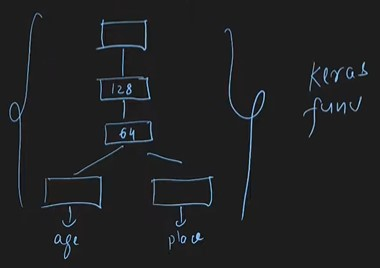

Now we will design the neural network with keras functional api which help us in building non-linear models.

In [4]:
#Importing function api
from keras.models import Model
from tensorflow.keras.layers import Input

In [12]:
model = Model(
    inputs= x,
    outputs = [output1,output2]
)

In [8]:
from keras.layers import *

In [3]:
#We have a input columns having 3 columns
x = Input(shape=(3,))


In [9]:
hidden1 = Dense(128,activation='relu')(x)
#This means that hidden1 layer is getting input from input layer x
hidden2 = Dense(64,activation='relu')(hidden1)
#Hidden2 layer is getting input from hidden1 layer

In [10]:
output1 = Dense(1,activation='linear')(hidden2)
#Output1 layer is getting input from hidden2 layer

In [11]:
output2 = Dense(1,activation='linear')(hidden2)
#Output2 is getting input from hidden2

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.utils import plot_model
#This function is used to plot the model architecture

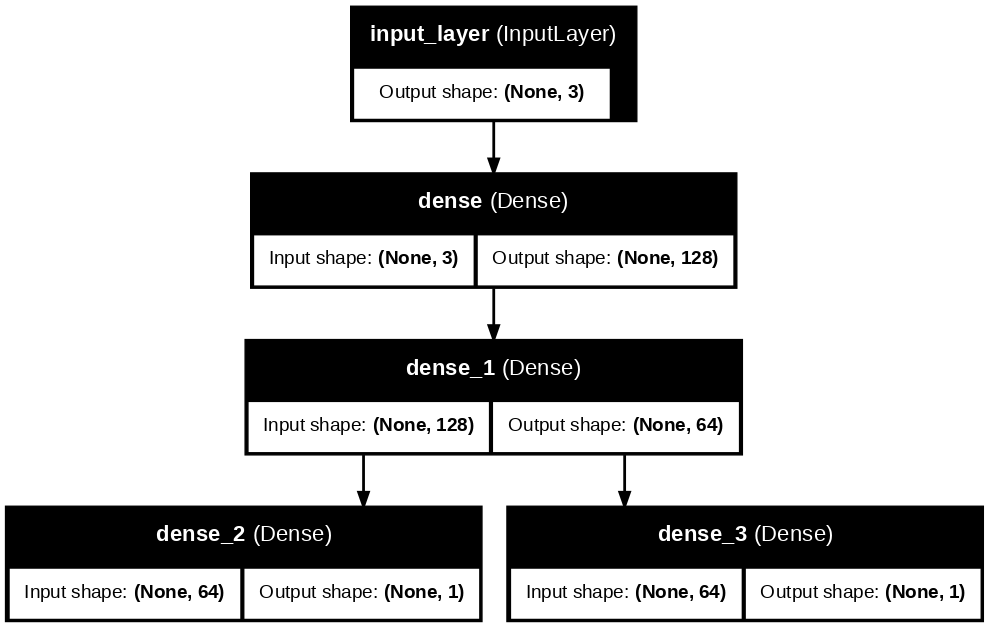

In [15]:
plot_model(model,
           to_file='model_plot.png',  # Save as an image
           show_shapes=True,          # Display layer shapes
           show_layer_names=True,     # Show layer names
           expand_nested=True,        # Expand nested models
           dpi=100)

So this is how we can use Keras Functional api to build non-sequential neural networks. We build a non-linar neural network architecture to predict age and emotions of a person in image data input.

**Multi Output Model-**

We have a dataset of 20000 images of face of a person. We have to predict the age and gender of the person.This is a problem of multiple output , one is age and another one is gender.

We will use transfer learning and use VGG16 pretrained model on ImageNet dataset.We will use convolutional layer of VGG16 and give output of convolutional layer of VGG16 to flatter layer.And now here at output of flatten layer we will do branching into two different fuly connected layer . One for prediction of age and another one is for prediction of gender.

Broader architecture of doing this could be like below:

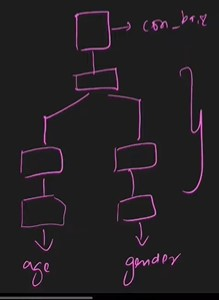

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [24]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors


In [25]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [26]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [55]:
#We want to create a dataframe where age ,
#gender and imgname are the columns in the dataframe so that i cn use thee in future.
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [56]:
len(age)

23708

In [57]:
df = pd.DataFrame({'age':age,'gender':gender,'img':img_path})

In [58]:
df.shape

(23708, 3)

In [59]:
df.head()

,age,gender,img
0,21,1,21_1_2_20170116170625776.jpg.chip.jpg
1,54,1,54_1_1_20170117204543384.jpg.chip.jpg
2,33,1,33_1_0_20170103183912066.jpg.chip.jpg
3,25,0,25_0_0_20170116213450000.jpg.chip.jpg
4,40,0,40_0_0_20170104204609691.jpg.chip.jpg


In [60]:
#DIving whole data into train and test data
train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [61]:
train_df.shape

(20000, 3)

In [62]:
test_df.shape

(3708, 3)

In [63]:
#Now we will do data augmentation on dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [83]:
#The flow_from_dataframe() function is used to generate batches of images and
#their corresponding labels from a Pandas DataFrame. It is particularly useful
#when dealing with large datasets where loading all images into memory at once
# is impractical.
train_generator = train_datagen.flow_from_dataframe(
   train_df,
    directory=folder_path,
    x_col='img',
    y_col=['age', 'gender'],  # Keeping multi-label outputs
    target_size=(200, 200),
    batch_size=32,
    class_mode='multi_output'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=folder_path,
    x_col='img',
    y_col=['age', 'gender'],
    target_size=(200, 200),
    class_mode='multi_output'
)



Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [84]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [85]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))
#Include_top = false means remove fully connected layers of VGG16 model
#input_shape = (200,200,3) means pixels of image is 200 * 200 with RGB color

In [86]:
resnet.trainable=False #e set it false because we will beusing transfer learning

#Storing the last layer of vggnet model into output layer
output = resnet.layers[-1].output

#Adding flatten layer which is connected to output layer
flatten = Flatten()(output)

#Adding dense1 and dense2 which is connected to flatten only
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

#Adding dense3 which is connected to dense1 and dense4 which is connected to dense2
dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

#Adding output1 connected to dense3 and output2 connected to dense4
output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [87]:
model = Model(inputs=resnet.input,outputs=[output1,output2])
#Input to the model is same as vggnet model
#Outputs of the model are output1 and output2

In [88]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 50, 50, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 126,875,522 (483.99 MB)

 Trainable params: 103,287,810 (394.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [89]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'},loss_weights={'age':1,'gender':99})

In [90]:
model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

TypeError: `output_signature` must contain objects that are subclass of `tf.TypeSpec` but found <class 'list'> which is not.